In [ ]:
import numpy as np
import matplotlib
from scipy.interpolate import interpolate as II
from pylab import *
from astropy.convolution import convolve
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel

ion()

_ = np.array

# Optics

In [2]:
# Wl(mi)  2Wndos   Col #1   Mirror   Col #2   Col #3   Col #4   Col #5   Col #6
tbl = '''0.850   0.9481   0.9514   0.9531   0.9684   0.9276   0.9556   0.9250   0.9706
0.975   0.9681   0.9714   0.9731   0.9884   0.9476   0.9756   0.9750   0.9906
0.985   0.9724   0.9716   0.9737   0.9896   0.9539   0.9814   0.9765   0.9909
1.000   0.9787   0.9720   0.9744   0.9895   0.9644   0.9882   0.9772   0.9894
1.100   0.9530   0.9730   0.9772   0.9805   0.9937   0.9865   0.9809   0.9869
1.200   0.9303   0.9774   0.9822   0.9903   0.9922   0.9928   0.9769   0.9927
1.300   0.9461   0.9733   0.9848   0.9856   0.9827   0.9889   0.9789   0.9861
1.400   0.9635   0.9725   0.9862   0.9798   0.9766   0.9836   0.9828   0.9816
1.500   0.9628   0.9783   0.9869   0.9806   0.9762   0.9832   0.9861   0.9820
1.600   0.9518   0.9838   0.9885   0.9835   0.9795   0.9850   0.9874   0.9842
1.700   0.9452   0.9840   0.9901   0.9840   0.9850   0.9852   0.9861   0.9834
1.800   0.9465   0.9805   0.9925   0.9799   0.9900   0.9849   0.9839   0.9811
1.900   0.9555   0.9765   0.9931   0.9777   0.9935   0.9846   0.9823   0.9810
2.000   0.9671   0.9755   0.9938   0.9779   0.9948   0.9854   0.9826   0.9812
2.100   0.9797   0.9770   0.9946   0.9801   0.9938   0.9873   0.9846   0.9828
2.200   0.9829   0.9789   0.9952   0.9821   0.9907   0.9884   0.9856   0.9842
2.300   0.9813   0.9795   0.9956   0.9829   0.9854   0.9879   0.9849   0.9848
2.400   0.9683   0.9774   0.9960   0.9811   0.9794   0.9829   0.9816   0.9820'''

# Wl(mi) Cam #1   Cam #2 Cam #3  Cam #4 Cam #5 Cam #6 Cam #7 
tbl2 = '''0.850 0.9463  0.9544 0.9572  0.9583 0.9644 0.9249 0.9563
0.975   0.9663  0.9744 0.9772  0.9783 0.9844 0.9449 0.9763        
0.985   0.9669  0.9828 0.9827  0.9830 0.9852 0.9568 0.9822 
1.000   0.9673  0.9874 0.9855  0.9878 0.9859 0.9729 0.9870 
1.100   0.9706  0.9855 0.9909  0.9907 0.9802 0.9777 0.9908 
1.200   0.9771  0.9848 0.9848  0.9887 0.9863 0.9712 0.9851 
1.300   0.9722  0.9832 0.9842  0.9826 0.9886 0.9766 0.9850 
1.400   0.9720  0.9837 0.9903  0.9819 0.9901 0.9820 0.9904 
1.500   0.9776  0.9865 0.9949  0.9852 0.9917 0.9856 0.9936 
1.600   0.9814  0.9869 0.9940  0.9888 0.9915 0.9856 0.9916 
1.700   0.9804  0.9852 0.9891  0.9889 0.9910 0.9837 0.9866 
1.800   0.9776  0.9825 0.9853  0.9885 0.9901 0.9813 0.9827 
1.900   0.9747  0.9826 0.9843  0.9888 0.9894 0.9805 0.9823 
2.000   0.9741  0.9843 0.9856  0.9897 0.9906 0.9809 0.9831 
2.100   0.9762  0.9880 0.9884  0.9908 0.9914 0.9847 0.9864 
2.200   0.9790  0.9917 0.9898  0.9909 0.9901 0.9882 0.9868 
2.300   0.9783  0.9934 0.9887  0.9884 0.9872 0.9889 0.9861 
2.400   0.9749  0.9913 0.9837  0.9832 0.9821 0.9864 0.9792'''

In [3]:
opt1 = np.fromstring(tbl, sep=' \n')
opt2 = np.fromstring(tbl2, sep=' \n')

In [4]:
opt1 = opt1.reshape((18, 9))
opt2 = opt2.reshape((18, 8))

In [5]:
l, windows2, col1, mirror, col2, col3, col4, col5 = opt2.T

ADC = windows2
corr = windows2 * col1
col = col1*col2*col3
dichroic = mirror



In [6]:
l, c1, c2, c3, c4, c5, c6, c7 = opt2.T
camera = c1*c2*c3*c4*c5*c6*c7 * c5 # Multiply by another for filter

# Detector

In [7]:
QE = lambda x: 0.85

# Telescope

In [8]:
tel = lambda x: 0.95**3

# Stops - Pupil and Lyot

In [9]:
stops = lambda x: 0.95

# Margin

In [10]:
margin = lambda x: 0.8

# Optics + Detector + Tel

In [11]:
thpt_optdet = II.interp1d(l, ADC*corr*col*camera * QE(l) * tel(l) * margin(l) * stops(l), bounds_error=False, fill_value=0)

# VPHG

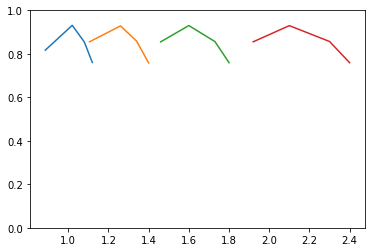

In [12]:
ly = _([0.886, 1.02, 1.08, 1.12])
ty = _([.86, .98, .9, .8])
fy = np.poly1d(np.polyfit(ly,ty,2)) * .95

lj = _([1.106, 1.260, 1.340, 1.400]) 
tj = _([.9, .98, .9, .8])
fj = np.poly1d(np.polyfit(lj,tj,2)) *.95

lh = _([1.46, 1.6, 1.73, 1.8])
th = _([.9, .98, .9, .8])
fh = np.poly1d(np.polyfit(lh,th,2)) * .95

lk = _([1.92, 2.1, 2.3, 2.4])
tk = _([.9, .98, .9, .8]) 
fk = np.poly1d(np.polyfit(lk, tk, 2)) * .95

#plot(ly,ty)
plot(ly, fy(ly))
plot(lj, fj(lj))
plot(lh, fh(lh))
plot(lk, fk(lk))

ylim(0,1)
show()

# Atmosphere

In [15]:
latm1.min()

1.4

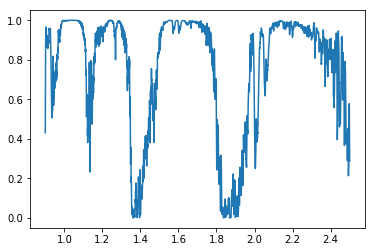

In [13]:
try:
    dat1
except:
    dat1 = np.loadtxt("atran.smo.12555.dat.txt")
    dat2 = np.loadtxt("atran.smo.12560.dat.txt")
    
    
x, latm1, tatm1 = dat1.T
x, latm2, tatm2 = dat2.T

latm = np.concatenate([latm2, latm1])
tatm = np.concatenate([tatm2, tatm1])

latm.shape

box_kernel = Box1DKernel(355)
plot(latm, convolve(tatm, box_kernel));

In [14]:
tpt_atm = II.interp1d(latm, convolve(tatm, box_kernel))

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc("font", **font)

In [ ]:
f = figure(figsize=(10,5))

plot(l,thpt_optdet(l), lw=3, color='blue')
xlabel(r"Wavelength [$\mu m$]")
ylabel("Transmission")

ly = np.linspace(np.min(ly), np.max(ly), 150)
lj = np.linspace(np.min(lj), np.max(lj), 150)
lh = np.linspace(np.min(lh), np.max(lh), 150)
lk = np.linspace(np.min(lk), np.max(lk), 150)


for s in ["y", "j", "h", "k"]:
    
    band_thpt = eval("thpt_optdet(l%s) * tpt_atm(l%s) * f%s(l%s)" % (s,s,s,s))
    eval("plot(l%s, band_thpt, lw=6, color='black')" % s)
    eval("plot(l%s, f%s(l%s), lw=2, color='red')" % (s,s,s))
    #eval("plot(l, f%s(l), color='black', lw=.25)" % s)
    

    

l = np.linspace(np.min(ly), np.max(lk), 1000)
plot(l, tpt_atm(l), color='black', lw=.5)

text(2.1, 1.0, "Atmosphere")
text(2.42, 0.77, "Blaze", color="red")
text(2.05, 0.55, "Tel. * ADC * Inst.", color='Blue')

yp = .65
text(1.00, yp, "Y", color='red')
text(1.25, yp, "J", color='red')
text(1.55, yp, "H", color='red')
text(2.10, yp, "K", color='red')



font = {'family' : 'normal',
        'weight' : 'bold'}
text(2.1, 0.1, "Total", color='black', fontdict=font)



ylim(0,1.1)
xlim(0.9,2.6)
grid(True)

tight_layout()


f.savefig("MIRMOS-thpt.pdf")

In [ ]:
?text